In [3]:
import tensorflow as tf
print(tf.__version__)

2.9.1


In [4]:
import numpy as np
import pandas as pd
import os

fpath = "C:/Users/aarja/OneDrive/Documents/images/Images"
print(os.listdir(fpath))
dog_classes = os.listdir(fpath)

['n02085620-Chihuahua', 'n02085782-Japanese_spaniel', 'n02085936-Maltese_dog', 'n02086079-Pekinese', 'n02086240-Shih-Tzu', 'n02086646-Blenheim_spaniel', 'n02086910-papillon', 'n02087046-toy_terrier', 'n02087394-Rhodesian_ridgeback', 'n02088094-Afghan_hound', 'n02088238-basset', 'n02088364-beagle', 'n02088466-bloodhound', 'n02088632-bluetick', 'n02089078-black-and-tan_coonhound', 'n02089867-Walker_hound', 'n02089973-English_foxhound', 'n02090379-redbone', 'n02090622-borzoi', 'n02090721-Irish_wolfhound', 'n02091032-Italian_greyhound', 'n02091134-whippet', 'n02091244-Ibizan_hound', 'n02091467-Norwegian_elkhound', 'n02091635-otterhound', 'n02091831-Saluki', 'n02092002-Scottish_deerhound', 'n02092339-Weimaraner', 'n02093256-Staffordshire_bullterrier', 'n02093428-American_Staffordshire_terrier', 'n02093647-Bedlington_terrier', 'n02093754-Border_terrier', 'n02093859-Kerry_blue_terrier', 'n02093991-Irish_terrier', 'n02094114-Norfolk_terrier', 'n02094258-Norwich_terrier', 'n02094433-Yorkshire_t

In [5]:
breeds = [breed.split('-',1)[1] for breed in dog_classes]

breeds[:10]

['Chihuahua',
 'Japanese_spaniel',
 'Maltese_dog',
 'Pekinese',
 'Shih-Tzu',
 'Blenheim_spaniel',
 'papillon',
 'toy_terrier',
 'Rhodesian_ridgeback',
 'Afghan_hound']

In [6]:


X=[]
y=[]

fullpaths = ["C:/Users/aarja/OneDrive/Documents/images/Images/{}".format(dog_class) for dog_class in dog_classes]

for counter,fullpath in enumerate(fullpaths):
    for imgname in os.listdir(fullpath) :
        X.append([fullpath + '/' + imgname])
        y.append(breeds[counter])
        
print(X[:10],"\n")
print(y[:10],'\n')

from itertools import chain
X = list(chain.from_iterable(X)) # to flatten X in 1-d array
print(X[:10],'\n')
len(X)

[['C:/Users/aarja/OneDrive/Documents/images/Images/n02085620-Chihuahua/n02085620_10074.jpg'], ['C:/Users/aarja/OneDrive/Documents/images/Images/n02085620-Chihuahua/n02085620_10131.jpg'], ['C:/Users/aarja/OneDrive/Documents/images/Images/n02085620-Chihuahua/n02085620_10621.jpg'], ['C:/Users/aarja/OneDrive/Documents/images/Images/n02085620-Chihuahua/n02085620_1073.jpg'], ['C:/Users/aarja/OneDrive/Documents/images/Images/n02085620-Chihuahua/n02085620_10976.jpg'], ['C:/Users/aarja/OneDrive/Documents/images/Images/n02085620-Chihuahua/n02085620_11140.jpg'], ['C:/Users/aarja/OneDrive/Documents/images/Images/n02085620-Chihuahua/n02085620_11238.jpg'], ['C:/Users/aarja/OneDrive/Documents/images/Images/n02085620-Chihuahua/n02085620_11258.jpg'], ['C:/Users/aarja/OneDrive/Documents/images/Images/n02085620-Chihuahua/n02085620_11337.jpg'], ['C:/Users/aarja/OneDrive/Documents/images/Images/n02085620-Chihuahua/n02085620_11477.jpg']] 

['Chihuahua', 'Chihuahua', 'Chihuahua', 'Chihuahua', 'Chihuahua', 'C

20580

In [7]:
import random

combine = list(zip(X,y))
print(combine[:10],"\n")
random.shuffle(combine)
print(combine[:10],"\n")

X[:], y[:] = zip(*combine) # for parallel iteration in combine
print(X[:10],'\n')
print(y[:10],'\n')

[('C:/Users/aarja/OneDrive/Documents/images/Images/n02085620-Chihuahua/n02085620_10074.jpg', 'Chihuahua'), ('C:/Users/aarja/OneDrive/Documents/images/Images/n02085620-Chihuahua/n02085620_10131.jpg', 'Chihuahua'), ('C:/Users/aarja/OneDrive/Documents/images/Images/n02085620-Chihuahua/n02085620_10621.jpg', 'Chihuahua'), ('C:/Users/aarja/OneDrive/Documents/images/Images/n02085620-Chihuahua/n02085620_1073.jpg', 'Chihuahua'), ('C:/Users/aarja/OneDrive/Documents/images/Images/n02085620-Chihuahua/n02085620_10976.jpg', 'Chihuahua'), ('C:/Users/aarja/OneDrive/Documents/images/Images/n02085620-Chihuahua/n02085620_11140.jpg', 'Chihuahua'), ('C:/Users/aarja/OneDrive/Documents/images/Images/n02085620-Chihuahua/n02085620_11238.jpg', 'Chihuahua'), ('C:/Users/aarja/OneDrive/Documents/images/Images/n02085620-Chihuahua/n02085620_11258.jpg', 'Chihuahua'), ('C:/Users/aarja/OneDrive/Documents/images/Images/n02085620-Chihuahua/n02085620_11337.jpg', 'Chihuahua'), ('C:/Users/aarja/OneDrive/Documents/images/Ima

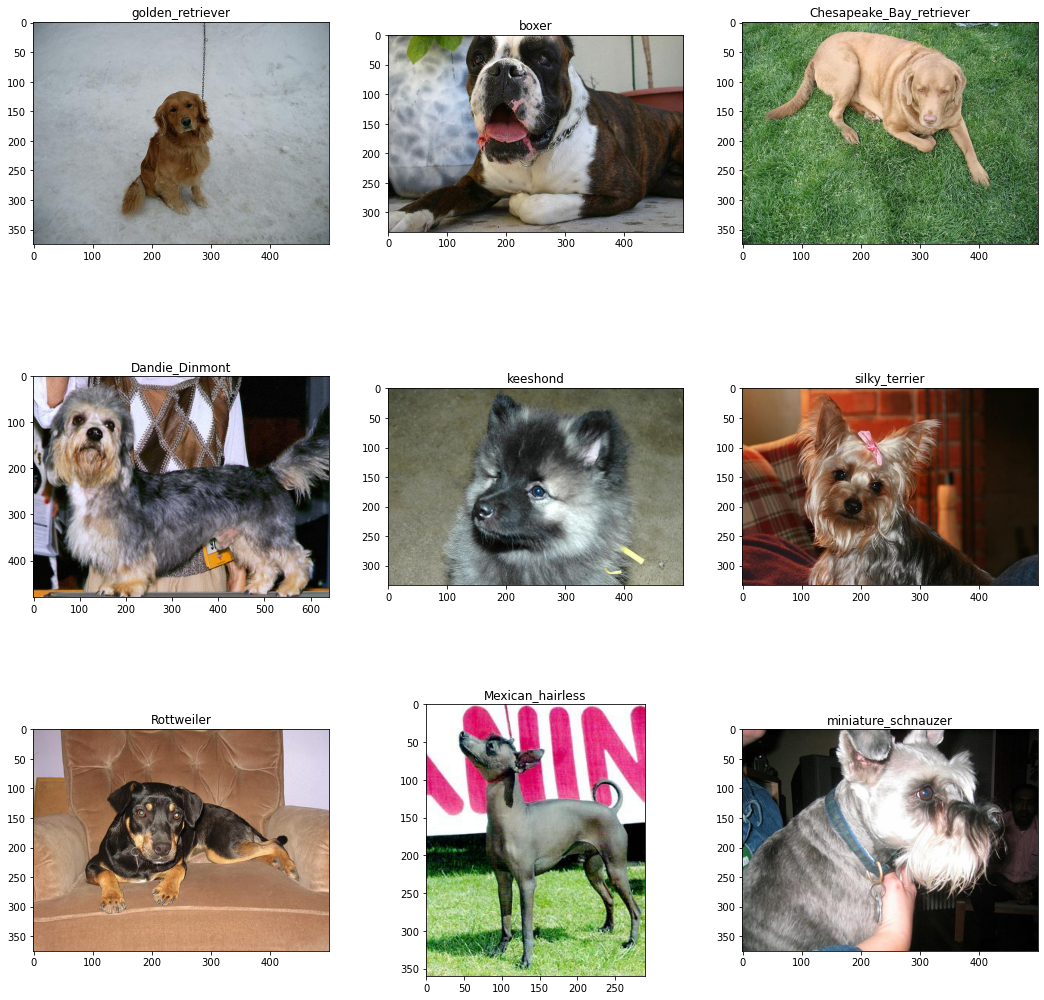

In [8]:
import matplotlib.pyplot as plt

from matplotlib.image import imread

%matplotlib inline

plt.figure(figsize=(18,18))

for counter,i in enumerate(random.sample(range(0,len(X)),9)):
    plt.subplot(3,3,counter+1)
    plt.subplots_adjust(hspace=0.3)
    filename = X[i]
    image = imread(filename)
    plt.imshow(image)
    plt.title(y[i],fontsize=12)

plt.show()

In [9]:
X = X[:1000]
y = y[:1000]

In [10]:
from sklearn.preprocessing import LabelEncoder
from keras.utils import to_categorical

label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

y_ohe = to_categorical(y,len(breeds))

y_ohe = np.array(y_ohe)
print(y_ohe.shape)


(1000, 120)


In [22]:
from sklearn.model_selection import train_test_split
from keras_preprocessing.image import img_to_array, load_img

img_data = np.array([img_to_array(load_img(img, target_size = (299,299))) for img in X])
print(img_data.shape)

x_train,x_test,y_train,y_test = train_test_split(img_data,y_ohe,test_size= 0.2,random_state=2)
x_train,x_val,y_train,y_val = train_test_split(x_train,y_train,test_size= 0.2,random_state=2)

print(x_train.shape)
print(x_val.shape)
print(x_test.shape)
print(y_train.shape)
print(y_val.shape)
print(y_test.shape)

x_train = np.array(x_train)
x_val = np.array(x_val)
x_test = np.array(x_test)
y_train = np.array(y_train)
y_val = np.array(y_val)
y_test = np.array(y_test)

(1000, 299, 299, 3)
(640, 299, 299, 3)
(160, 299, 299, 3)
(200, 299, 299, 3)
(640, 120)
(160, 120)
(200, 120)


In [23]:
from keras.applications.inception_v3 import preprocess_input
from keras_preprocessing.image import ImageDataGenerator

batch_size = 32

train_datagen = ImageDataGenerator(preprocessing_function=preprocess_input,
                                  rotation_range = 30,
                                  width_shift_range = 0.2,
                                  height_shift_range = 0.2,
                                  horizontal_flip = True)

train_generator = train_datagen.flow(x_train,y_train,shuffle=False,batch_size=batch_size,seed=1)

val_datagen = ImageDataGenerator(preprocessing_function=preprocess_input)

val_generator = val_datagen.flow(x_val,y_val,shuffle=False,batch_size=batch_size,seed=1)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


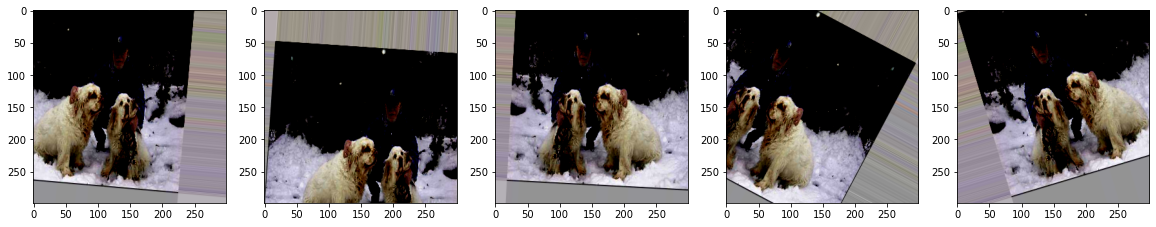

In [24]:
img_id = 2
dog_generator = train_datagen.flow(x_train[img_id:img_id+1], y_train[img_id:img_id+1],
                               shuffle=False,batch_size=batch_size,seed=1)

plt.figure(figsize=(20,20))
dogs = [next(dog_generator) for i in range(0,5)]
for counter, dog in enumerate(dogs):
    plt.subplot(1,5,counter+1)
    plt.imshow(dog[0][0])
    
plt.show()

In [25]:
from keras import models
from keras import layers
from keras.optimizers import Adam
from keras.layers import GlobalAveragePooling2D, Dense, Flatten, Dropout
from keras.applications.inception_v3 import InceptionV3
from keras.utils.np_utils import to_categorical
from keras.utils.vis_utils import plot_model

base_model = InceptionV3(weights = 'imagenet',include_top=False,input_shape=(299,299,3))

model = models.Sequential()
model.add(base_model)
model.add(GlobalAveragePooling2D())
model.add(Dropout(0.3))
model.add(Dense(512,activation='relu'))
model.add(Dense(512,activation='relu'))
model.add(Dense(len(breeds),activation='softmax'))

print("Number of trainable weights before freezing the base layer:", len(model.trainable_weights))
model.layers[0].trainable = False
print("Number of trainable weights after freezing the base layer:", len(model.trainable_weights))

Number of trainable weights before freezing the base layer: 194
Number of trainable weights after freezing the base layer: 6


In [29]:
model.compile(Adam(lr=.0003), loss='categorical_crossentropy',metrics=['accuracy'])
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inception_v3 (Functional)   (None, 8, 8, 2048)        21802784  
                                                                 
 global_average_pooling2d_2   (None, 2048)             0         
 (GlobalAveragePooling2D)                                        
                                                                 
 dropout_2 (Dropout)         (None, 2048)              0         
                                                                 
 dense_5 (Dense)             (None, 512)               1049088   
                                                                 
 dense_6 (Dense)             (None, 512)               262656    
                                                                 
 dense_7 (Dense)             (None, 120)               61560     
                                                      

In [39]:
plot_model(model, to_file='model.png',show_shapes=True,show_layer_names=True)

SyntaxError: invalid syntax (3260385924.py, line 1)

In [30]:
train_steps_per_epoch = x_train.shape[0] // batch_size
val_steps_per_epoch = x_val.shape[0] // batch_size
epochs = 20

history = model.fit_generator(train_generator,
                              steps_per_epoch = train_steps_per_epoch,
                             validation_data = val_generator,
                              validation_steps = val_steps_per_epoch,
                              epochs = epochs,verbose=1
                             )

C:\Users\aarja\AppData\Local\Temp\ipykernel_16636\1502548923.py:5: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(train_generator,


Epoch 1/20
20/20 [==============================] - 52s 2s/step - loss: 4.7332 - accuracy: 0.0391 - val_loss: 4.5229 - val_accuracy: 0.1312
Epoch 2/20
20/20 [==============================] - 44s 2s/step - loss: 4.1544 - accuracy: 0.2422 - val_loss: 4.0096 - val_accuracy: 0.3313
Epoch 3/20
20/20 [==============================] - 47s 2s/step - loss: 3.2964 - accuracy: 0.4609 - val_loss: 3.1432 - val_accuracy: 0.4500
Epoch 4/20
20/20 [==============================] - 52s 3s/step - loss: 2.2533 - accuracy: 0.6313 - val_loss: 2.3064 - val_accuracy: 0.5437
Epoch 5/20
20/20 [==============================] - 55s 3s/step - loss: 1.4504 - accuracy: 0.7406 - val_loss: 1.7602 - val_accuracy: 0.5750
Epoch 6/20
20/20 [==============================] - 52s 3s/step - loss: 1.0568 - accuracy: 0.7703 - val_loss: 1.2213 - val_accuracy: 0.7063
Epoch 7/20
20/20 [==============================] - 53s 3s/step - loss: 0.7317 - accuracy: 0.8391 - val_loss: 1.0363 - val_accuracy: 0.7188
Epoch 8/20
20/20 [==

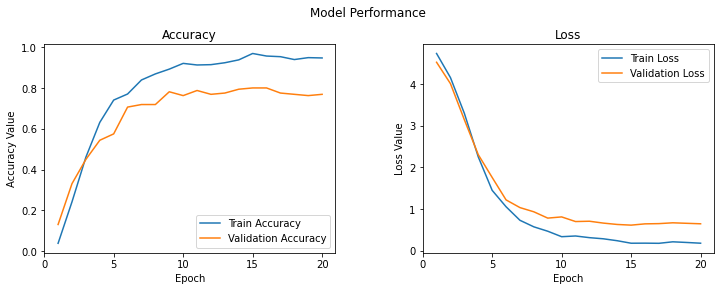

In [34]:
f, (ax1,ax2) = plt.subplots(1,2,figsize=(12,4))
t = f.suptitle('Model Performance',fontsize=12)
f.subplots_adjust(top=0.85,wspace=0.3)

epoch_list = list(range(1,epochs+1))
ax1.plot(epoch_list,history.history['accuracy'],label='Train Accuracy')
ax1.plot(epoch_list,history.history['val_accuracy'],label='Validation Accuracy')
ax1.set_xticks(np.arange(0,epochs+1,5))
ax1.set_ylabel('Accuracy Value')
ax1.set_xlabel('Epoch')
ax1.set_title('Accuracy')
l1 = ax1.legend(loc="best")

ax2.plot(epoch_list,history.history['loss'],label='Train Loss')
ax2.plot(epoch_list, history.history['val_loss'], label='Validation Loss')
ax2.set_xticks(np.arange(0,epochs+1,5))
ax2.set_ylabel('Loss Value')
ax2.set_xlabel('Epoch')
ax2.set_title('Loss')
l2 = ax2.legend(loc="best")

In [37]:
x_test1 = x_test/255
test_predictions = model.predict(x_test1)

predictions = label_encoder.classes_[np.argmax(test_predictions,axis=1)]
target_labels = label_encoder.classes_[np.argmax(y_test,axis=1)]

predict_df = pd.DataFrame({'Target Labels' : target_labels,'Predictions': predictions})
predict_df.head(20)

7/7 [==============================] - 12s 2s/step


,Target Labels,Predictions
0,collie,collie
1,Lhasa,Shih-Tzu
2,French_bulldog,Boston_bull
3,Lakeland_terrier,wire-haired_fox_terrier
4,schipperke,schipperke
5,Great_Dane,Great_Dane
6,Siberian_husky,Eskimo_dog
7,Great_Pyrenees,Great_Pyrenees
8,Tibetan_terrier,Tibetan_terrier
9,African_hunting_dog,African_hunting_dog
